In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

In [3]:
df = pd.read_csv('tips.csv')

In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.shape

(244, 7)

In [7]:
# Transform categorical features to numerical form using appropriate encoding techniques
for feature in df.select_dtypes(include=['object']).columns:
    if df[feature].nunique() <= 10: 
        df = pd.get_dummies(df, columns=[feature], drop_first=True)
    else:
        encoder = LabelEncoder()
        df[feature] = encoder.fit_transform(df[feature])


scaler = StandardScaler()
num_features = df.select_dtypes(include=['float64', 'int64']).columns
df[num_features] = scaler.fit_transform(df[num_features])

X = df.drop(columns='tip')  
y = df['tip']


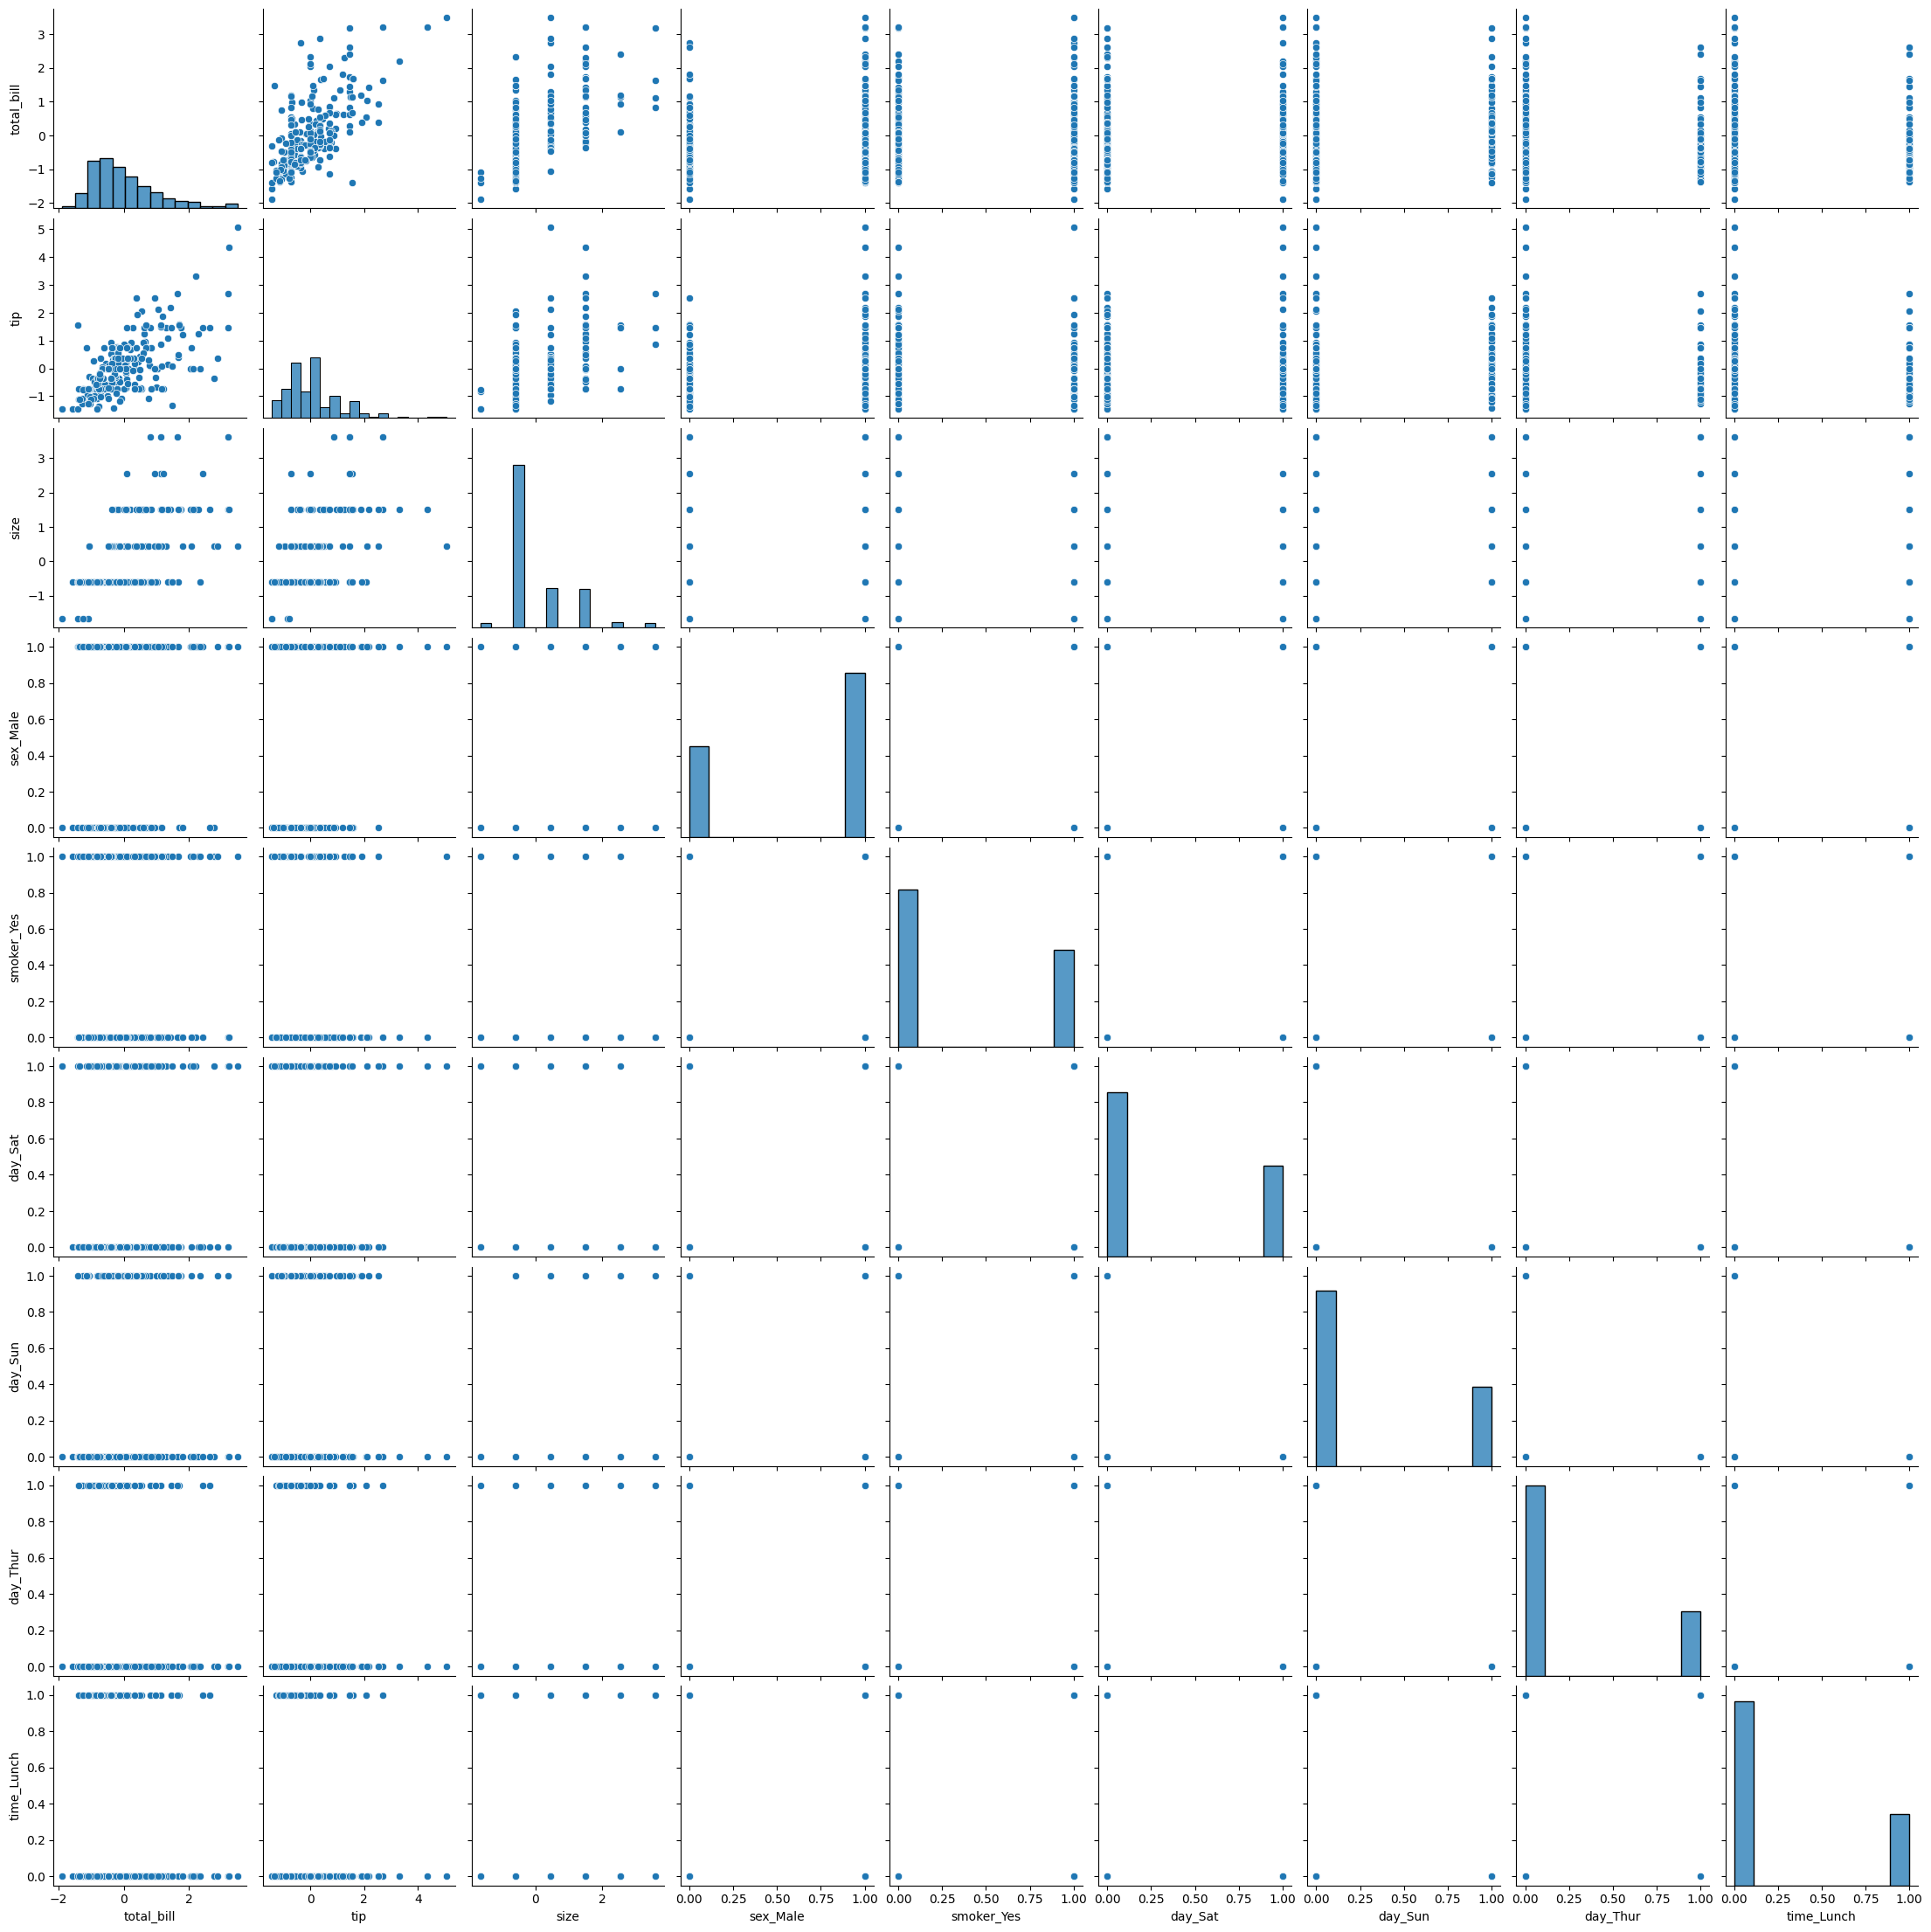

In [8]:
# .pairplots
sns.pairplot(df)
plt.show()

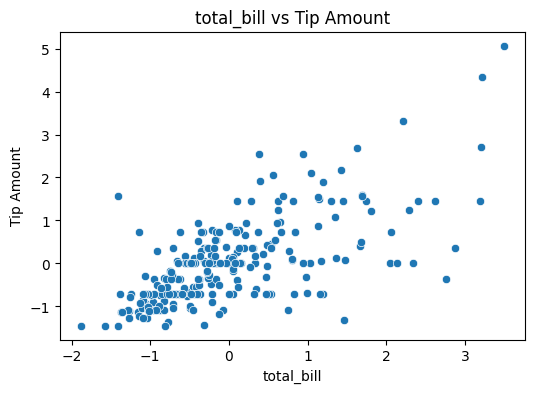

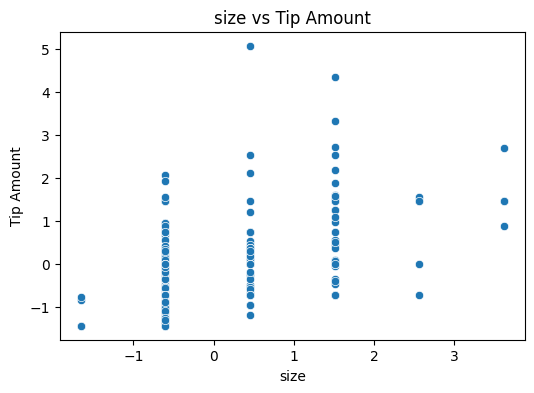

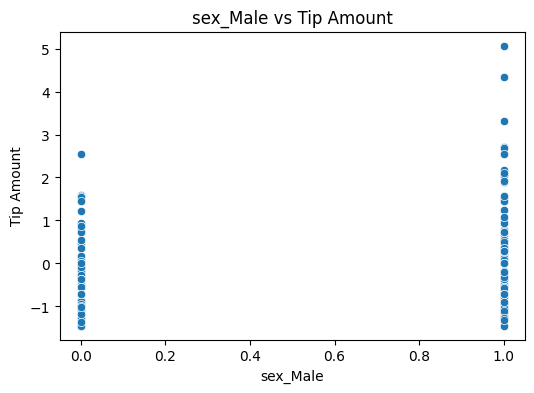

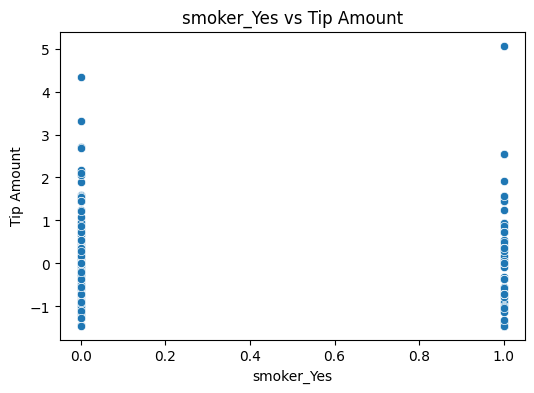

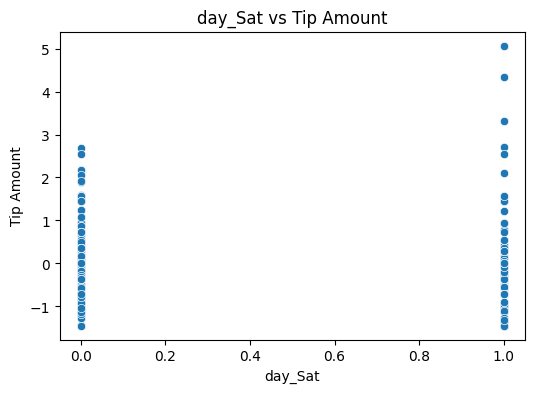

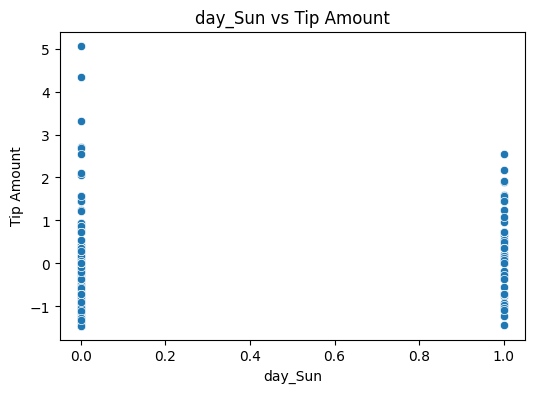

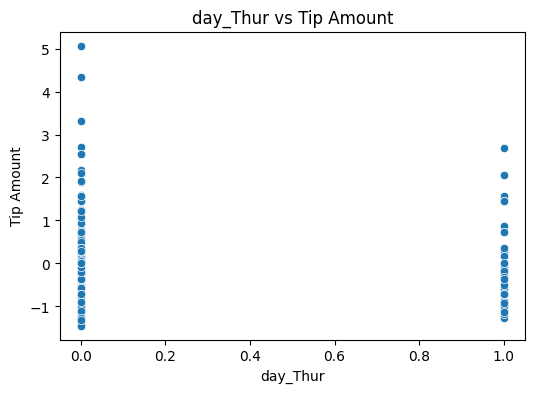

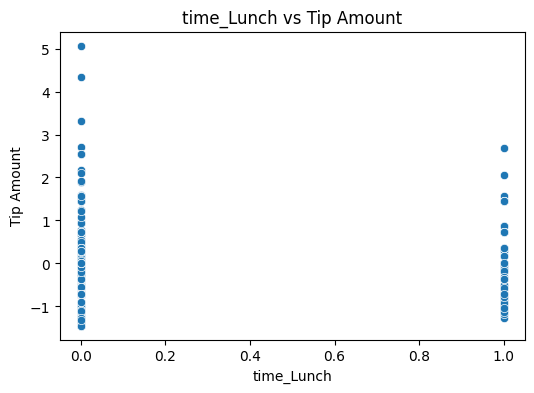

In [9]:
# Generate scatter plots for each feature in X against the target variable y
for feature in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=y)
    plt.title(f'{feature} vs Tip Amount')
    plt.xlabel(feature)
    plt.ylabel('Tip Amount')
    plt.show()



here we can see that total bill vs tip amount is linear data

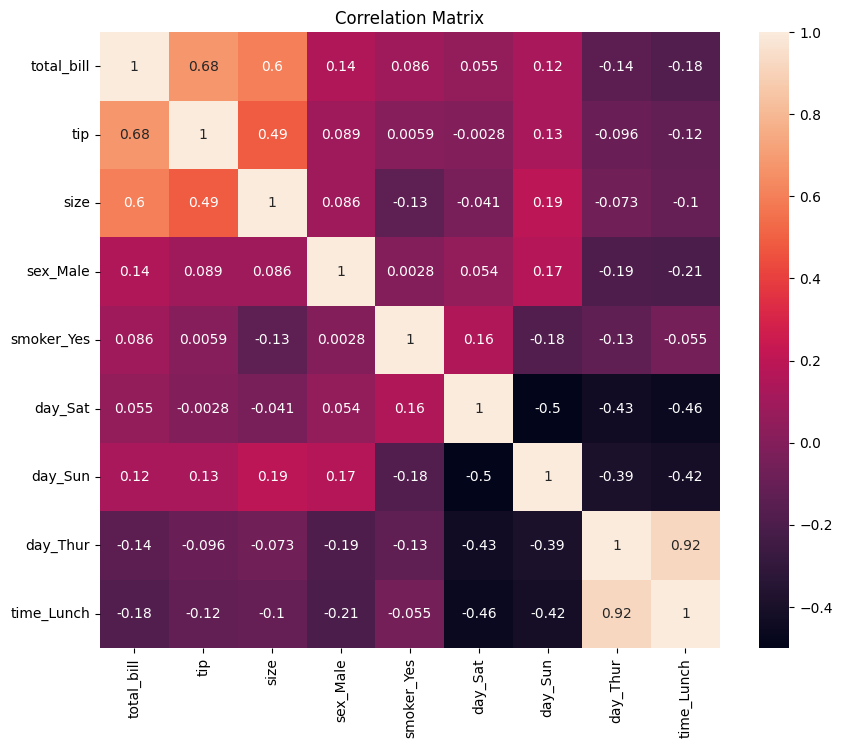

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [11]:
X = X.astype(float)
y = y.astype(float)
X_with_const = sm.add_constant(X)
rainbow_statistic, rainbow_p_value = linear_rainbow(sm.OLS(y, X_with_const).fit())
print(f"Rainbow Test p-value: {rainbow_p_value}")

# the value comes out to be greater than 0.05 , that is a larger p value that suggests enough evidence for linearity , hence data is linear therefore we can use linear models

Rainbow Test p-value: 0.16588383059241668


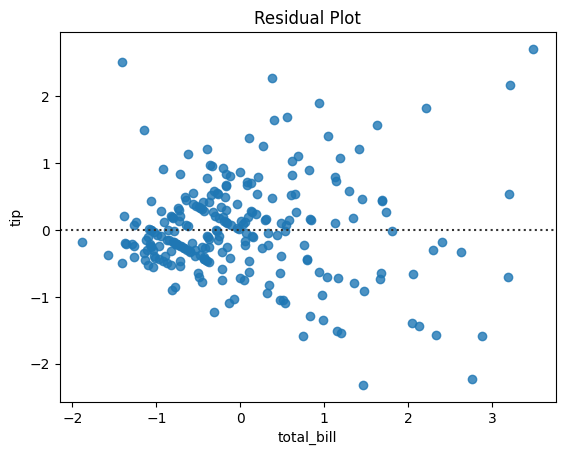

In [12]:
sns.residplot(x = "total_bill", y = "tip", data = df)
plt.title("Residual Plot")
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression Results:\nMAE: {mae_linear}, RMSE: {rmse_linear}, R2 Score: {r2_linear}\n")


Linear Regression Results:
MAE: 0.4831497467653271, RMSE: 0.6073751512403224, R2 Score: 0.43730181943482527



In [15]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression Results:\nMAE: {mae_ridge}, RMSE: {rmse_ridge}, R2 Score: {r2_ridge}\n")


Ridge Regression Results:
MAE: 0.4829534662931501, RMSE: 0.6061977321213261, R2 Score: 0.43948132718620425



In [16]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression Results:\nMAE: {mae_lasso}, RMSE: {rmse_lasso}, R2 Score: {r2_lasso}\n")


Lasso Regression Results:
MAE: 0.7583315244593878, RMSE: 0.8716731588976983, R2 Score: -0.15896098636013756



In [17]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regressor Results:\nMAE: {mae_dt}, RMSE: {rmse_dt}, R2 Score: {r2_dt}\n")


Decision Tree Regressor Results:
MAE: 0.590459262536606, RMSE: 0.7789814321367013, R2 Score: 0.07441633314243079



In [18]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor Results:\nMAE: {mae_rf}, RMSE: {rmse_rf}, R2 Score: {r2_rf}\n")


Random Forest Regressor Results:
MAE: 0.5270813310301422, RMSE: 0.6847987784153448, R2 Score: 0.28470131873077176



In [19]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)
print(f"Support Vector Regressor Results:\nMAE: {mae_svr}, RMSE: {rmse_svr}, R2 Score: {r2_svr}\n")


Support Vector Regressor Results:
MAE: 0.46852161497611494, RMSE: 0.6119361045879892, R2 Score: 0.4288191667913209



In [20]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Regressor Results:\nMAE: {mae_knn}, RMSE: {rmse_knn}, R2 Score: {r2_knn}\n")


K-Nearest Neighbors Regressor Results:
MAE: 0.5214073057263177, RMSE: 0.6628405211228627, R2 Score: 0.32983835164634523



* Out of all ridge regression model gave the best results as it has the least error

In [23]:

feature_importances = random_forest_model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df

,Feature,Importance
0,total_bill,0.769819
3,smoker_Yes,0.064762
1,size,0.062173
4,day_Sat,0.030481
5,day_Sun,0.027689
2,sex_Male,0.022438
6,day_Thur,0.012623
7,time_Lunch,0.010015


* from feature importance we can see that total bill column in the most important feature while training random forest then smoker stands at second


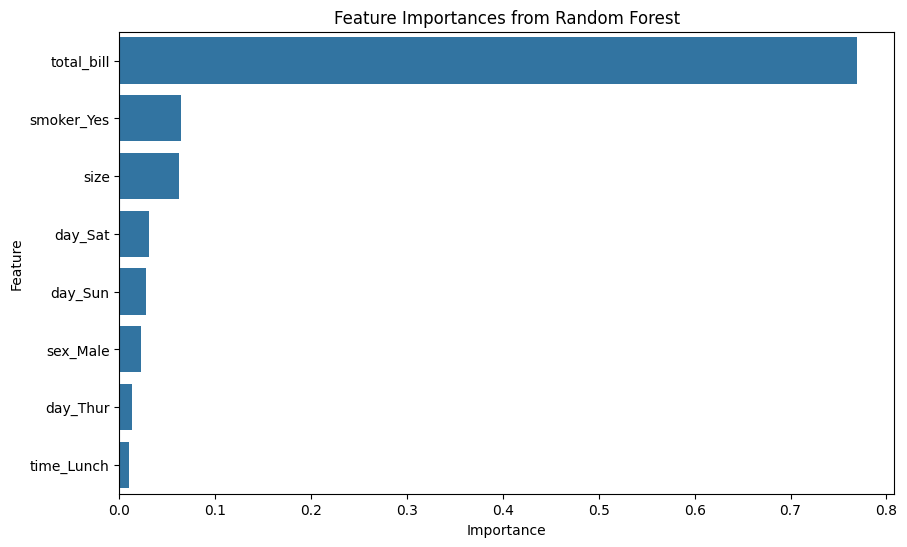

In [24]:

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importances from Random Forest")
plt.show()

* Maximize Revenue from Total Bill Influence on Tips
Since the total bill plays the most significant role in tip prediction, management could introduce special add-ons or combo deals that encourage larger orders. Bundling popular items or introducing exclusive upsell options can raise the bill value, subsequently increasing tip amounts and enhancing staff motivation.

* Encourage Non-Smoking Dining Options
Given the lower influence of smoking on tipping, promoting non-smoking sections or benefits for non-smoking patrons (like better seating options) could subtly guide patrons towards a potentially higher-tipping environment. This move may also improve customer satisfaction and increase loyalty.

* Leverage Table Size for Service Efficiency and Personalization
The moderate impact of table size on tip amounts suggests tailoring service based on party size may be beneficial. Larger tables could be offered communal-style dishes, while smaller parties might enjoy personalized attention. This could enhance customer satisfaction, likely leading to increased tipping.

* Focus on Weekend Promotions (Saturday and Sunday)
With Saturday and Sunday being notable for tips, management could develop targeted campaigns for these days. Introducing themed events or offering exclusive weekend discounts could attract more customers, raising total bills and consequently, tip amounts.

* Reallocate Resources to Dinner Service
As "time_Lunch" has a relatively low influence on tipping, management might consider directing resources more heavily toward dinner shifts. Offering premium dining options in the evening could capitalize on higher spending potential, optimizing revenue and tip levels.